# Kaggle study 5주차 발표 자료
> ### 한국어번역 & 주석 version
>### [코드출처](https://www.kaggle.com/code/ash316/eda-to-prediction-dietanic)

In [1]:
#from IPython.display import Image



<img src = "data/image1.jpg" width = "45%" height = "45%"> 

<img src = "data/image2.jpg" width = "45%" height = "45%"> 

<img src = "data/image3.jpg" width = "45%" height = "45%"> 

<img src = "data/image4.jpg" width = "45%" height = "45%"> 

- reference 문교수님 방학특강

## 참고
 변수 | 설명
------- | -------
**PassengerId** | id
**Survived** | 생존 여부 (0 = 사망, 1 = 생존) 
**Pclass** | 티켓 클래스 (1 = 1등석, 2 = 2등석, 3 = 3등석)
**name** | 이름  
**Sex** | 성별
**Age** | 나이
**SibSp** | 함께 탑승한 자녀 , 배우자 의 수
**Parch** | 함께 탑승한 부모님 , 아이들 의 수
**Fare** | 요금
**Ticket** | 티켓 번호
**Cabin** | 수하물 번호
**Embarked** | 선착장 

- - -

# EDA To Prediction (DieTanic)


### *Sometimes life has a cruel sense of humor, giving you the thing you always wanted at the worst time possible.*
                                                                                       -Lisa Kleypas

                                                                                                                                     

타이타닉의 침몰은 역사상 가장 악명 높은 난파선 사고 중 하나입니다. 1912년 4월 15일, 처녀 항해 중이던 타이타닉은 빙산과 충돌한 후 침몰하여 승객과 승무원 2224명 중 1502명이 사망했습니다. 그래서 **타이타닉**이라는 이름이 붙었습니다.  전 세계 어느 누구도 잊을 수 없는 참사입니다.

타이타닉 호를 제작하는 데 약 750만 달러가 소요되었고 충돌로 인해 바다 밑으로 가라앉았습니다. 타이타닉 데이터 집합은 초보자가 데이터 과학의 여정을 시작하고 Kaggle의 경연 대회에 참가하기에 매우 좋은 데이터 집합입니다.


이 노트북의 목적은 **예측 모델링 문제의 워크플로**에 대한 아이디어를 제공하는 것입니다. 기능을 확인하는 방법, 새로운 기능을 추가하는 방법 및 몇 가지 머신 러닝 개념에 대해 설명합니다. 초보자도 노트북의 모든 단계를 이해할 수 있도록 가능한 한 기본적인 내용을 담으려고 노력했습니다.

노트북이 마음에 들고 도움이 되었다고 생각하신다면 **please upvote**.

## Contents of the Notebook:

#### Part1: 탐색적 데이터 분석(EDA):
1)feature 분석

2)여러가지 feature들 간 관계 혹은 trends 찾기
#### Part2: 피처 엔지니어링 & 데이터 클리닝:
1)몇가지 새로운 feature 추가

2)중복되는 feature 제거

3)모델링에 적합한 형태로 변환하기
#### Part3: 예측 모델링
1)기본 알고리즘 실행

2)교차검증

3)앙상블

4)중요 feature 추출

## Part1: Exploratory Data Analysis(EDA)
### (탐색적 데이터 분석)

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data=pd.read_csv('data/train.csv')
#데이터 불러오기

In [4]:
data.head()
#데이터 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.isnull().sum() 
#결측치 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Age, Cabin and Embarked** 에 결측치가 확인됩니다

### How many Survived??
### (얼마나 살아남았나?)

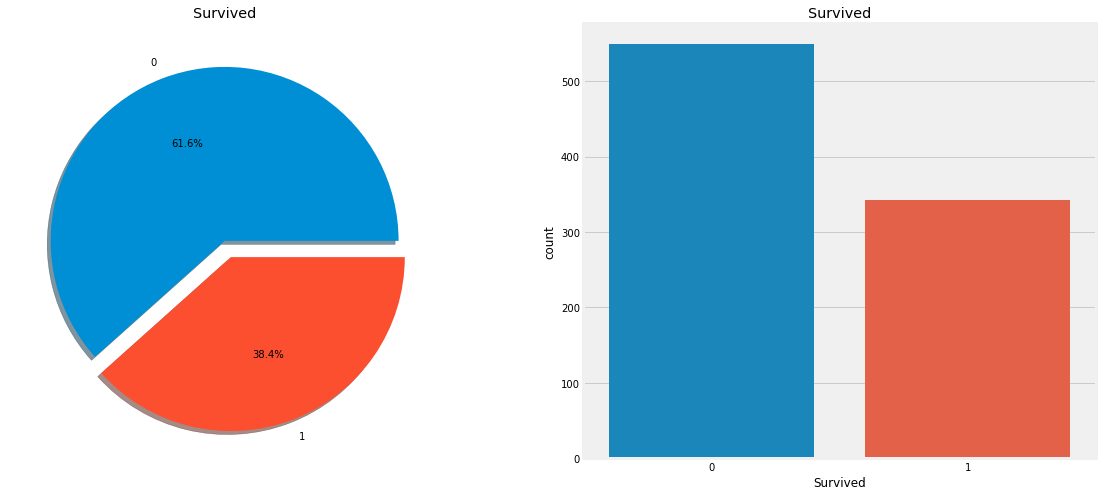

In [6]:
f,ax=plt.subplots(1,2,figsize=(18,8))   #2개의 그래프를 그리기 위한 코드
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True) # 원그래프 그리기
ax[0].set_title('Survived')   # 제목지정
ax[0].set_ylabel('') # 첫밴째 원그래프 y축 라벨 이름 지정
sns.countplot('Survived',data=data,ax=ax[1]) # seaborn으로 countplot 그리기
ax[1].set_title('Survived')    #두번째 그래프 제목지정
plt.show() 


사고에서 살아남은 승객이 많지 않은 것은 분명합니다. 

891명의 승객 중 약 350명만이 살아남았습니다. 즉, 전체 승객의 **38.4%** 만이 사고에서 살아남은 것입니다. 데이터에서 더 나은 인사이트를 얻고 생존한 승객과 그렇지 않은 승객의 범주를 확인하려면 더 자세히 조사해야 합니다.

데이터 집합의 다양한 feature를 사용하여 생존율을 확인하려고 합니다. 일부 feature는 sex, Port Of Embarcation, age 등입니다.

먼저 다양한 유형의 feature를 이해해보도록 하겠습니다.

- - -

## Types Of Features

### Categorical Features:
범주형 변수는 두 개 이상의 범주가 있고 해당 기능의 각 값을 범주별로 분류할 수 있는 변수로, 예를 들어 성별은 두 가지 범주(남성, 여성)를 가진 범주형 변수입니다. 이제 이러한 변수는 정렬하거나 순서를 지정할 수 없습니다. 이를 **명목 변수**라고도 합니다.

**Categorical Features in the dataset: Sex,Embarked.**

### Ordinal Features:
An ordinal variable 은 범주형 값과 비슷하지만, 값 간에 상대적인 순서나 정렬을 지정할 수 있다는 점에서 차이가 있습니다. 예를 들어, **Height**와 같은 피처에 **Tall, Medium, Short** 값이 있는 경우 Height는 ordinal variable입니다. 여기서 변수에 상대 정렬을 사용할 수 있습니다.

**Ordinal Features in the dataset: PClass**

### Continous Feature:
두 점 사이의 값 또는 기능 열의 최소값 또는 최대값 사이의 값을 취할 수 있는 경우 피처를 continous라고 합니다.

**Continous Features in the dataset: Age**

- - -

## Feature 분석

## Sex--> Categorical Feature

In [7]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

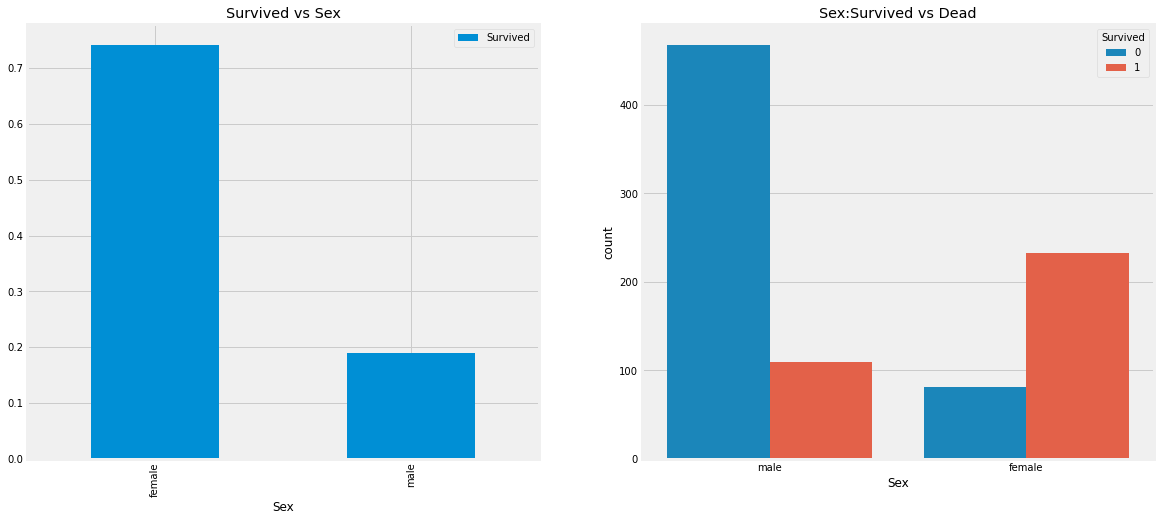

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1]) #hue 를 통해 생존자와 사망자를 같이 보여줌
ax[1].set_title('Sex:Survived vs Dead')
plt.show()
#첫 번쨰 플롯은 막대그래프를 사용하여 성별에 따른 생존자 비율을 보여준다
#두 번째 플롯은 countplot을 이용하여 성별에 따른 생존자와 사망자의 수를 보여준다
#seaborn -> countplot
#matplotlib -> 막대그래프

흥미로워 보이네요. 배에 탄 남성의 수가 여성의 수보다 훨씬 많습니다. 그럼에도 불구하고 구출된 여성의 수가 남성의 거의 두 배에 달합니다. 배에 탑승한 **여성의 생존율은 약 75%, 남성의 생존율은 약 18~19%입니다.**

이것은 모델링에 있어 **매우 중요한** feature인 것 같습니다. 하지만 이것이 최선일까요?   다른 feature도 확인해 보겠습니다.

## Pclass --> Ordinal Feature

In [9]:
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
# 승객 등급을 기준으로 생존자와 비생존자 수의 빈도 분포를 보여주는 판다 크로스탭 함수를 사용하여 생존자 수의 빈도 분포를 보여준다
# 'margins=True' 는 테이블에 행과 열의 합계를 추가해준다
# 색상 그라데이션을 사용하여 결과테이블의 스타일을 지정

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


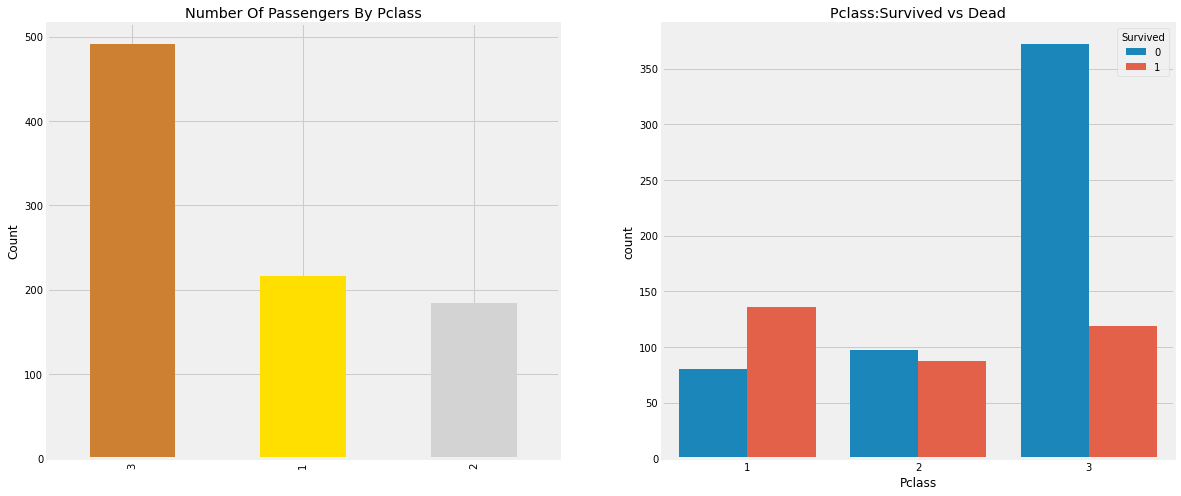

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()
# 첫 번째 플롯은 각 좌석 Pclasd(1등석, 2등석, 3등석)의 승객 수를 막대 그래프를 이용하여 보여준다.
# 두 번째 플롯은 seaborn 라이브러리의 카운트플롯을 사용하여 각 승객 클래스에서 생존한 승객과 생존하지 못한 승객의 수를 보여준다
# 나머지 코드는 제목과 레이블을 설정하고 그림을 표시

사람들은 **돈으로 모든 것을 살 수 없다** 고 말합니다. 그러나 우리는 구조 과정에서 1등석 승객들에게 매우 높은 우선순위가 주어졌다는 것을 분명히 알 수 있습니다. Pclass 3의 승객 수는 훨씬 더 많았지만 여전히 생존자 수는 약 **25%** 로 매우 낮습니다.

Pclass 1의 경우 생존율은 약 **63%** 이고 Pclass 2의 경우 약 **48%** 입니다. 그러니까 돈과 지위가 중요하죠. 참으로 물질주의적인 세상입니다.

조금 더 들어가서 다른 흥미로운 관찰 결과를 확인해 봅시다. sex 와 Pclass로 생존율을 함께 확인해 봅시다.

In [11]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

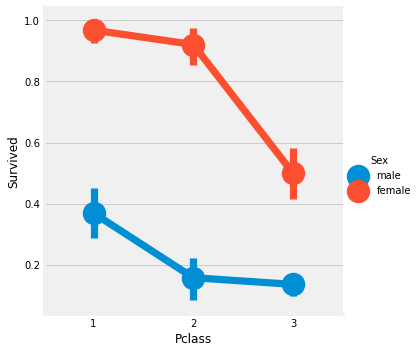

In [12]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

이 경우 **FactorPlot** 을 사용하는 이유는 범주형 값을 쉽게 구분할 수 있기 때문입니다.

**CrossTab** 과 **FactorPlot** 을 보면, Pclass1의 여성 94명 중 3명만 사망했기 때문에 **P클래스1** 여성의 생존율은 약 **95-96%** 라는 것을 쉽게 유추할 수 있습니다. 

Pclass와 상관없이 구조 과정에서 여성을 최우선으로 고려했다는 것을 알 수 있습니다. Pclass1의 남성도 생존율이 매우 낮습니다.

|Pclass도 중요한 feature인 것 같습니다. 다른 feature들을 분석해 보겠습니다.

## Age--> Continous Feature


In [13]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


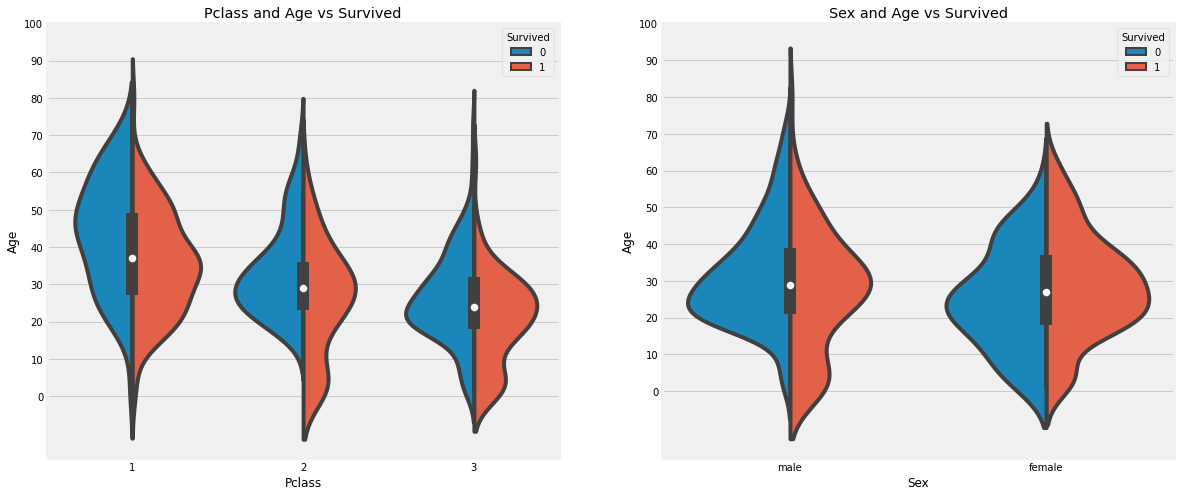

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 관찰:

1)Pclass가 낮아짐에 따라 어린이 수가 증가하며, 10세 미만(즉, 어린이)의 생존율은 Pclass에 관계없이 양호한 것으로 보입니다.

2)20~50세 탐승객의 생존 확률은 Pclass1 에서 높으며, 여성의 경우 더 좋은 것으로 나타났습니다.

3)남성의 경우 연령이 증가함에 따라 생존 확률이 감소합니다.

앞서 살펴본 것처럼, age feature에는 **177** 개의 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 연령을 할당할 수 있습니다.

하지만 문제는 다양한 연령대의 사람들이 많다는 것입니다. 4살짜리 아이에게 29살이라는 평균 연령을 할당할 수는 없습니다. 승객이 어떤 연령대에 속하는지 알아낼 수 있는 방법이 있을까요?

**빙고!!!!** 우리는 **Name Feature** 에서 확인할 수 있습니다. 이 feature를 살펴보면 이름에 Mr 또는 Mrs와 같은 salutation(호칭)이 있는 것을 알 수 있습니다. 따라서 Mr와 Mrs의 평균값을 각 그룹에 할당할 수 있습니다.

**''What's In A Name??''**---> **Feature** :p

In [ ]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') # Salutations 추출하기

자, 여기서는 정규식을 사용하고 있습니다: **[A-Za-z]+)\.**. 따라서 **A-Z 또는 a-z** 사이에 있는 문자열과 그 뒤에 **.(점)** 이 오는 문자열을 찾습니다. 따라서 이름에서 이니셜을 성공적으로 추출했습니다.

In [ ]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Miss를 나타내는 Mlle 또는 Mme와 같은 철자가 틀린 이니셜이 몇 개 있습니다. Miss로 바꾸고 다른 값에 대해서도 동일하게 바꾸겠습니다.

In [17]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [18]:
data.groupby('Initial')['Age'].mean() #Initials별 나이의 평균 확인

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [19]:
## 나이별 평균값을 올림하여 결측치에 할당
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [20]:
data.Age.isnull().any() #최종적으로 결측값이 없음을 확인 

False

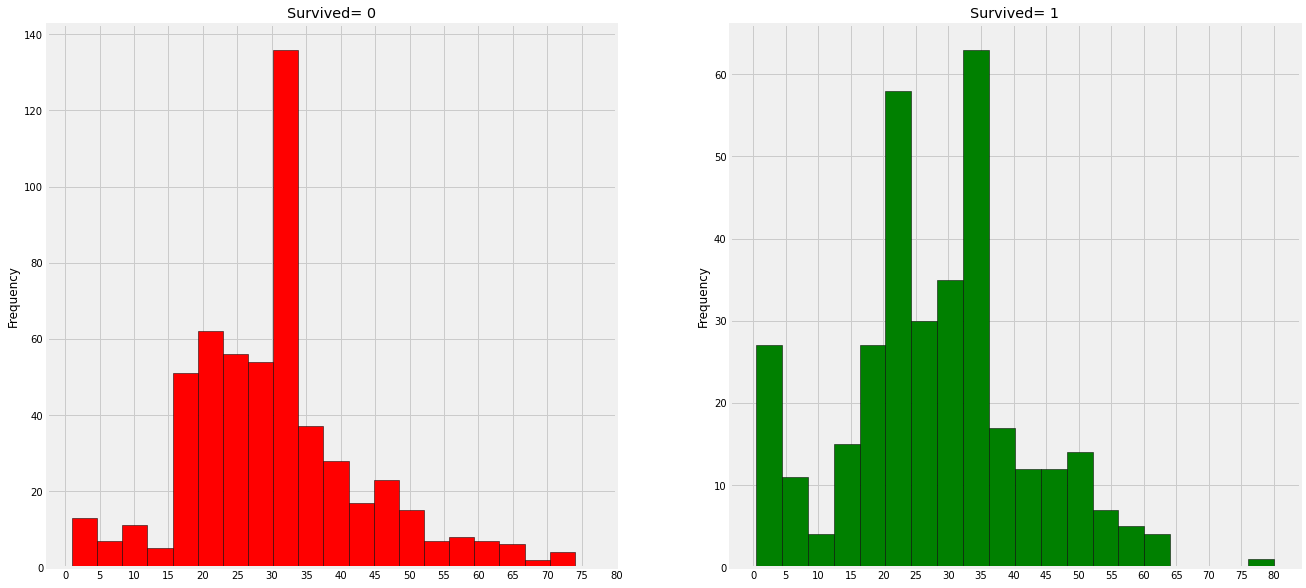

In [21]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()
#생존하지 못한 탑승자의 연령분포와 생존한 탑승자의 연령 분포를 보여준다

### 관찰 사항:
1)유아(5세 미만)가 많이 구출되었습니다(여성 및 아동 우선 정책).

2)최고령 승객(80세)이 구조되었습니다.

3)최대 사망자 수는 30-40세 연령대였습니다.

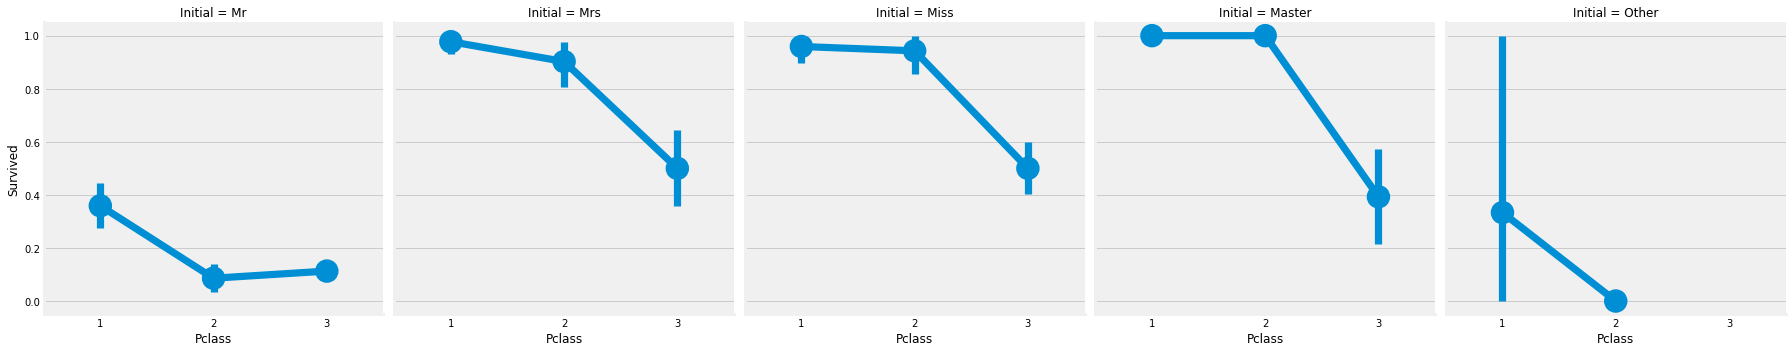

In [22]:
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

따라서 여성과 아동 우선 정책은 계층에 관계없이 적용됩니다.

## Embarked--> Categorical Value

In [23]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

### 승선항구(Port Of Embarkation) 별 생존확률

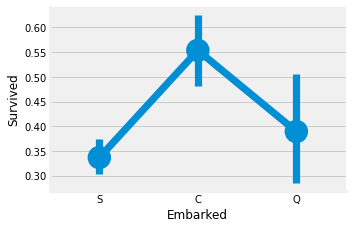

In [24]:
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

항구 C의 생존 확률은 약 0.55로 가장 높은 반면 항구S는 가장 낮습니다.

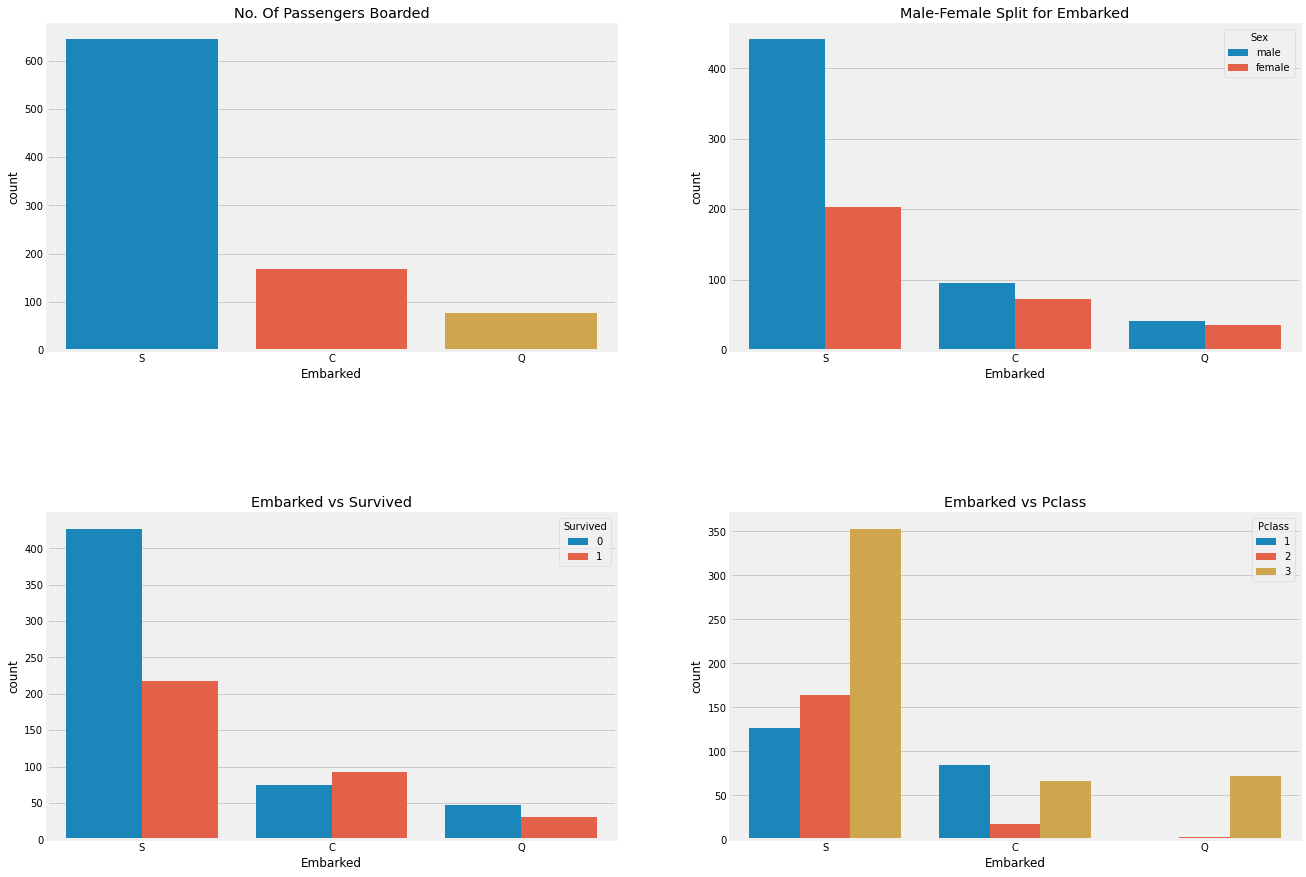

In [25]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

### 관찰:
1)최대 승객은 S에서 탑승했으며, 대부분은 P 클래스 3에서 탑승했습니다.

2)C호 승객의 상당수가 생존한 것으로 보아 운이 좋았던 것으로 보입니다. 그 이유는 아마도 P클래스1과 P클래스2 승객이 모두 구조되었기 때문일 것입니다.

3)The Embark S는 대부분의 부유층이 탑승한 좌현을 바라보고 있습니다. 약 **81%** 의 P클래스3 승객이 생존하지 못했기 때문에 여전히 생존 가능성은 낮습니다. 

4)포트 Q는 승객의 거의 95%가 P클래스3 출신이었습니다.

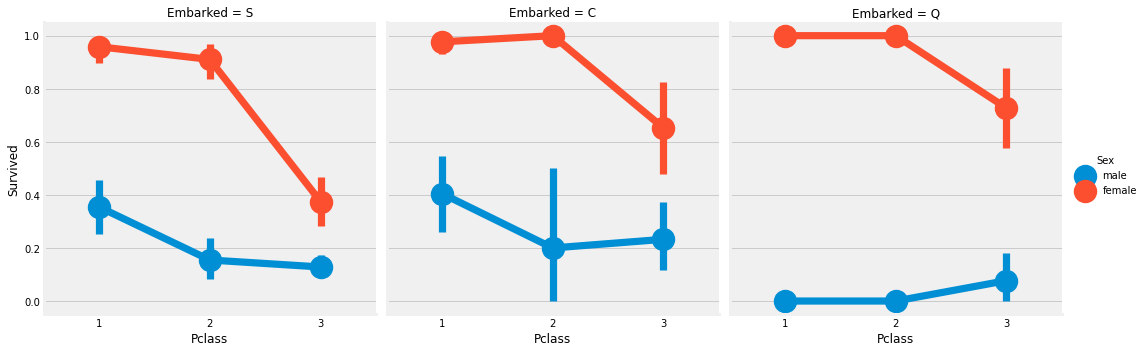

In [26]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

### 관찰 결과:

1)P클래스1과 P클래스2는 P클래스와 상관없이 여성의 생존 확률이 거의 1에 가깝습니다.

2)포트 S는 남녀 모두 생존 확률이 매우 낮기 때문에 P클래스3 탑승자에게는 매우 불운한 것으로 보입니다.**(돈 문제)**.

3)포트 Q는 거의 모든 합격자가 P클래스3 출신으로 남성에게 가장 불운한 것으로 보입니다.


### Filling Embarked NaN

포트 S에서 최대 승객이 탑승한 것을 확인했으므로 NaN을 S로 바꿉니다.

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.Embarked.isnull().any()# Finally No NaN values

False

## SibSip-->Discrete Feature
이 feature은 사용자가 혼자 있는지 또는 가족과 함께 있는지를 나타냅니다.

형제자매 = 형제, 자매, 의붓형제, 의붓자매\
(Sibling = brother, sister, stepbrother, stepsister)

배우자 = 남편, 아내 \
(Spouse = husband, wife)

In [29]:
pd.crosstab([data.SibSp],data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


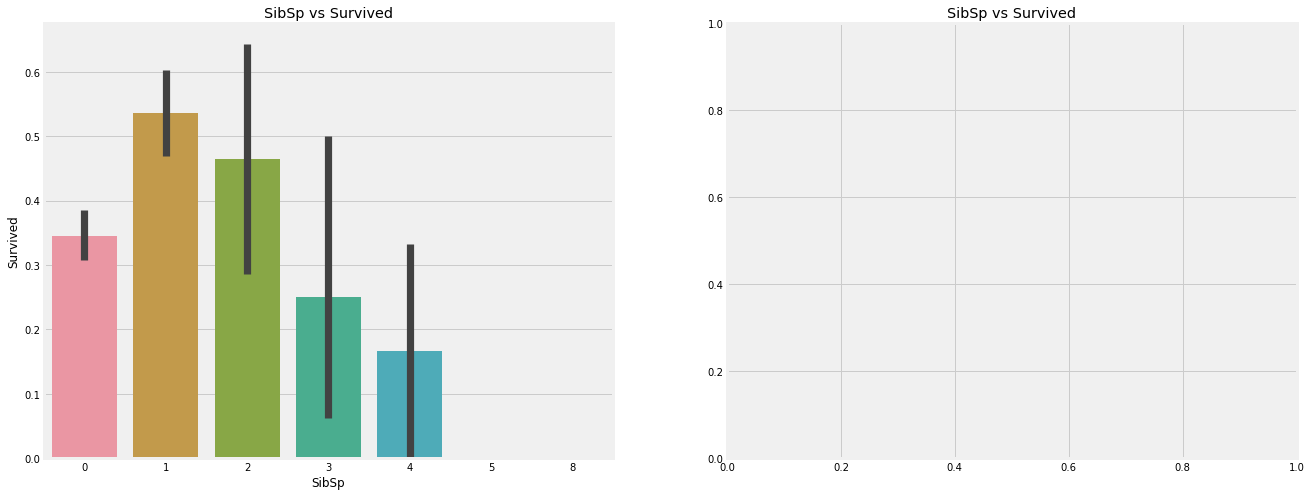

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [31]:
pd.crosstab(data.SibSp,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### 관측값:


막대 그래프와 요인 그래프를 보면 형제자매 없이 혼자 기내에 탑승한 승객의 생존율은 34.5%입니다. 형제자매의 수가 증가하면 그래프는 대략적으로 감소합니다. 이것은 의미가 있습니다. 즉, 기내에 가족이 있다면 나를 먼저 구하기보다는 가족을 구하려고 노력할 것입니다. 놀랍게도 5~8명인 가족의 생존율은 **0%** 입니다. 그 이유는 P클래스 때문일까요?

이유는 **P클래스** 입니다. 크로스탭을 보면 SibSp>3인 사람은 모두 Pclass3에 속해 있습니다. Pclass3(>3)의 대가족이 모두 사망한 것이 임박했습니다.

## Parch

In [32]:
pd.crosstab(data.Parch,data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


크로스탭을 다시 보면 가족 구성원이 많은 가족이 Pclass3에 속해 있음을 알 수 있습니다.

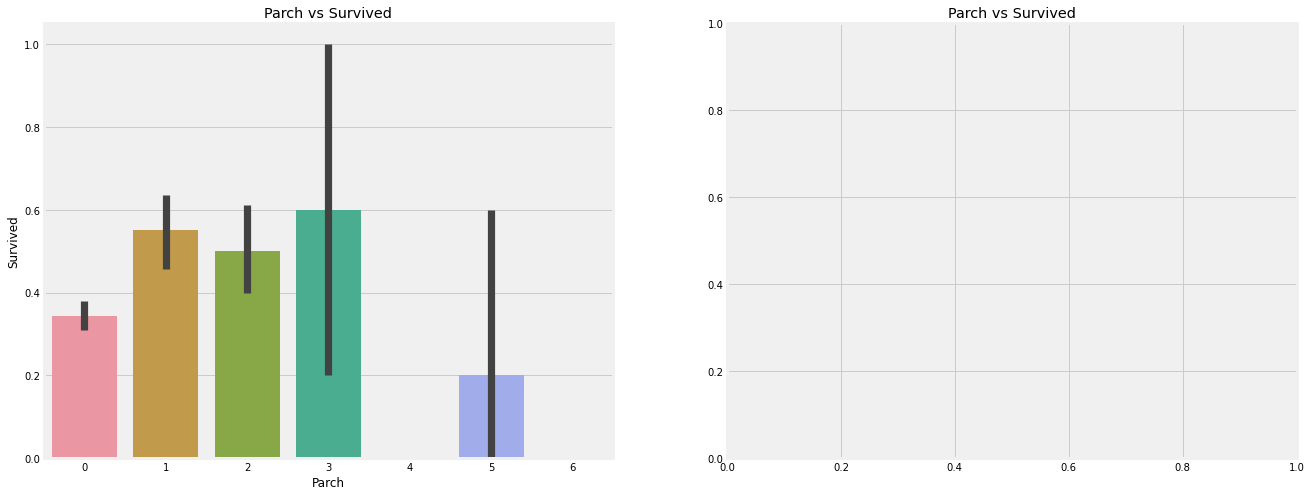

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

### 관찰:

여기에서도 결과는 매우 유사합니다. 부모와 함께 탑승한 승객의 생존 확률이 더 높습니다. 그러나 그 수가 늘어날수록 감소합니다.

배에 부모가 1~3명 있는 승객의 생존 확률은 좋은 편입니다. 혼자 있는 것도 치명적인 것으로 판명되었으며, 배에 부모가 4명 이상인 경우 생존 확률이 감소합니다.

## Fare--> Continous Feature

In [34]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


최저 요금은 **0.0** 입니다.

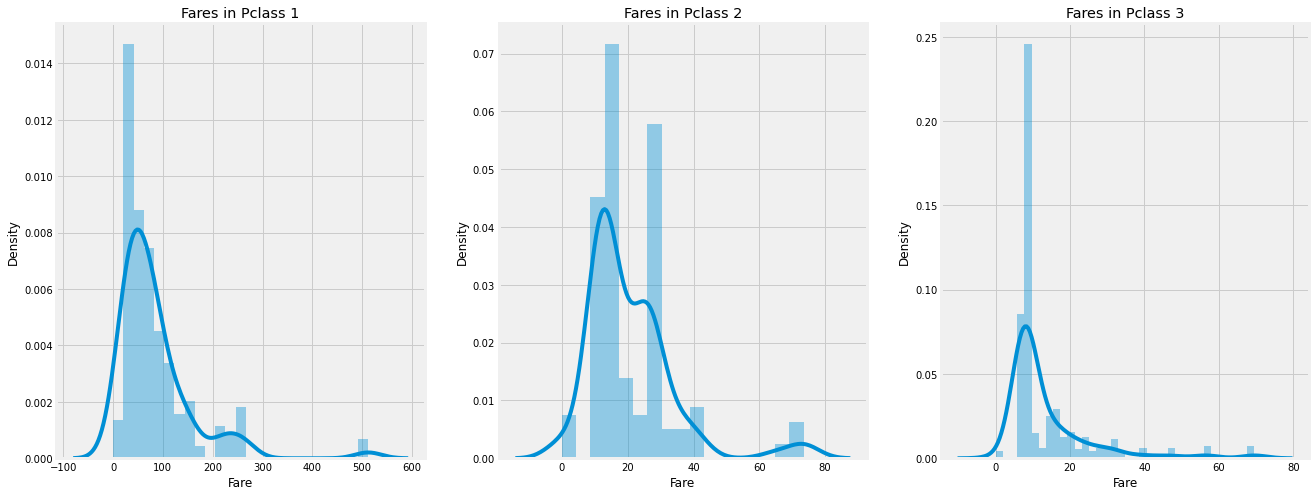

In [35]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

P클래스1 승객의 요금은 큰 분포를 보이며, 이 분포는 기준이 낮아질수록 계속 감소합니다. 이 역시 연속적이므로 비닝을 사용하여 불연속적인 값으로 변환할 수 있습니다.

## 모든 피처에 대한 관찰 및 요약:


**성별:** 여성이 남성에 비해 생존 확률이 높습니다.

**P등급:** **1등석 승객**이 되면 생존 확률이 높아지는 경향이 뚜렷합니다. P클래스3의 생존율은 매우 낮습니다**.  **여성의 경우** , **P클래스1** 의 생존 확률은 거의 1에 가깝고 **P클래스2**의 생존 확률도 높습니다.   **돈이 이긴다!!!**. 

**연령:** 5-10세 미만의 어린이는 생존 확률이 높습니다. 15세에서 35세 사이의 승객이 많이 사망했습니다.

**승선(Embarked):** 이것은 매우 흥미로운 특징입니다. **대부분의 P클래스1 승객이 S에서 일어났음에도 불구하고 C에서 생존할 확률이 더 높은 것으로 보입니다.** Q의 승객은 모두 **P클래스3** 출신이었습니다. 

**형제+자매(Parch+SibSp):** 혼자 탑승하거나 대가족이 함께 여행하는 것보다 1~2명의 형제자매, 배우자 또는 1~3명의 부모님이 탑승하는 것이 더 높은 확률을 보입니다.


## Correlation Between The Features

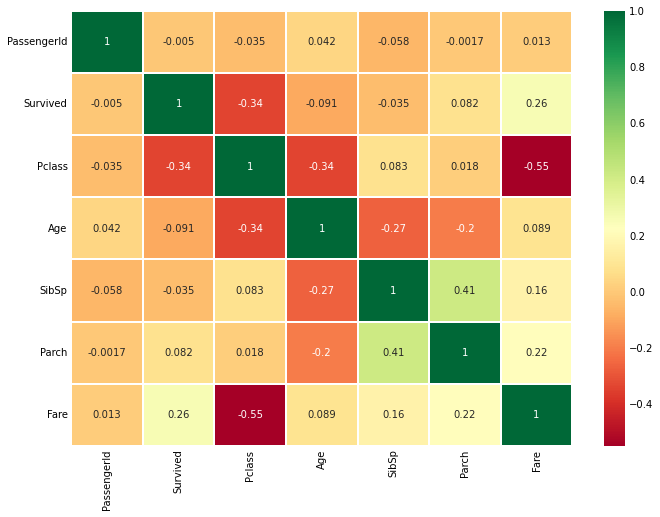

In [36]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### 히트맵 해석하기

가장 먼저 주목해야 할 점은 알파벳이나 문자열 간의 상관관계는 알 수 없으므로 숫자 특징만 비교한다는 것입니다. 플롯을 이해하기 전에 상관관계가 정확히 무엇인지 살펴봅시다.

**양의 상관관계:** **특징 A의 증가가 특징 B의 증가로 이어진다면, 이 둘은 양의 상관관계**를 가집니다. 값이 **1이면 완벽한 양의 상관관계**를 의미합니다.

**음의 상관관계:** **특징 A의 증가가 특징 B의 감소로 이어지면 음의 상관관계**입니다. 값이 **-1이면 완전한 음의 상관관계**를 의미합니다.

이제 두 피처의 상관관계가 매우 높거나 완벽하여 한 피처의 증가가 다른 피처의 증가로 이어진다고 가정해 보겠습니다. 이는 두 특징이 매우 유사한 정보를 포함하고 있으며 정보의 분산이 거의 없거나 전혀 없다는 것을 의미합니다. 이를 **다중 공선성**이라고 하는데, 두 특징 모두 거의 동일한 정보를 포함하고 있기 때문입니다.

그렇다면 **둘 중 하나는 중복되므로** 둘 다 사용해야 할까요? 모델을 만들거나 학습할 때 중복되는 기능을 제거하면 학습 시간이 단축되는 등 여러 가지 이점이 있으므로 중복 피처를 제거해야 합니다.

이제 위의 히트맵에서 특징들 간의 상관관계가 크지 않다는 것을 알 수 있습니다. 가장 높은 상관관계는 **SibSp와 Parch, 즉 0.41** 사이의 상관관계입니다. 따라서 모든 피처를 계속 사용할 수 있습니다.


## Part2: Feature Engineering and Data Cleaning

이제 피처 엔지니어링이란 무엇일까요?

피처가 포함된 데이터 집합이 주어질 때마다 모든 피처가 중요할 필요는 없습니다. 제거해야 할 중복된 피처가 많을 수도 있습니다. 또한 다른 피처에서 정보를 관찰하거나 추출하여 새로운 피처를 얻거나 추가할 수도 있습니다.

예를 들어 이름 피처를 사용하여 초기 피처를 가져올 수 있습니다. 새로운 피처를 얻고 몇 가지 피처를 제거할 수 있는지 살펴봅시다. 또한 기존의 관련 피처를 예측 모델링에 적합한 형태로 변환할 것입니다.

## Age_band

#### Problem With Age Feature:
앞서 **나이는 연속형 특징** 이라고 언급했듯이, 머신러닝 모델에서 연속형 변수에 문제가 있습니다.

**예:** 성별로 스포츠 선수를 그룹화하거나 정렬하라고 하면 쉽게 남성과 여성으로 구분할 수 있습니다.

이제 **연령** 별로 그룹화하라고 하면 어떻게 할 수 있을까요? 인원이 30명이라면 30개의 연령 값이 있을 수 있습니다. 이제 이것은 문제가 됩니다.

비닝 또는 정규화를 통해 이러한 **연속형 값을 범주형 값** 으로 변환해야 합니다. 여기서는 비닝, 즉 다양한 연령대를 하나의 구간차원으로 그룹화하거나 단일 값을 할당하는 방법을 사용하겠습니다.

승객의 최대 연령이 80세라고 가정해 보겠습니다. 따라서 0~80의 범위를 5개의 구간으로 나누어 보겠습니다. 따라서 80/5=16입니다.
따라서 크기 16의 구간입니다.


In [37]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [38]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


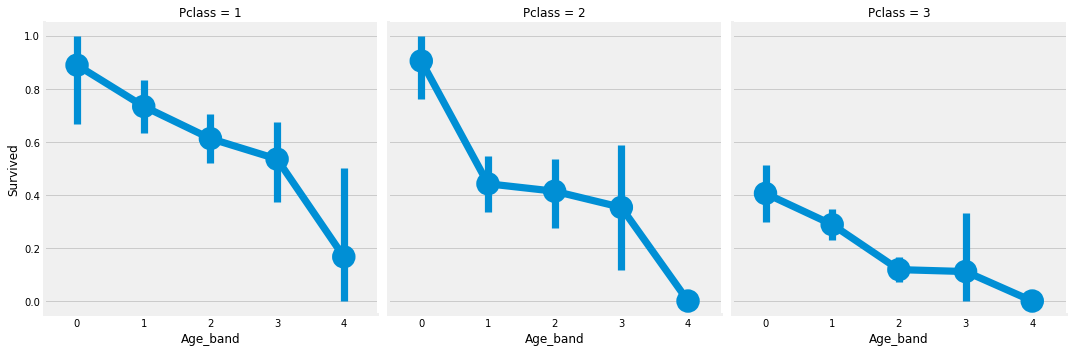

In [39]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

사실... P클래스와 관계없이 연령이 높아질수록 생존율이 감소합니다.

## Family_Size and Alone
이 시점에서 "Family_size" 및 "Alone"이라는 새로운 피처를 생성하고 분석할 수 있습니다. \
이 피처는 Parch와 SibSp의 합입니다. \
생존율이 승객의 가족 규모와 관련이 있는지 확인할 수 있도록 결합된 데이터를 제공합니다. \
Alone은 승객이 혼자 있는지 여부를 나타냅니다.

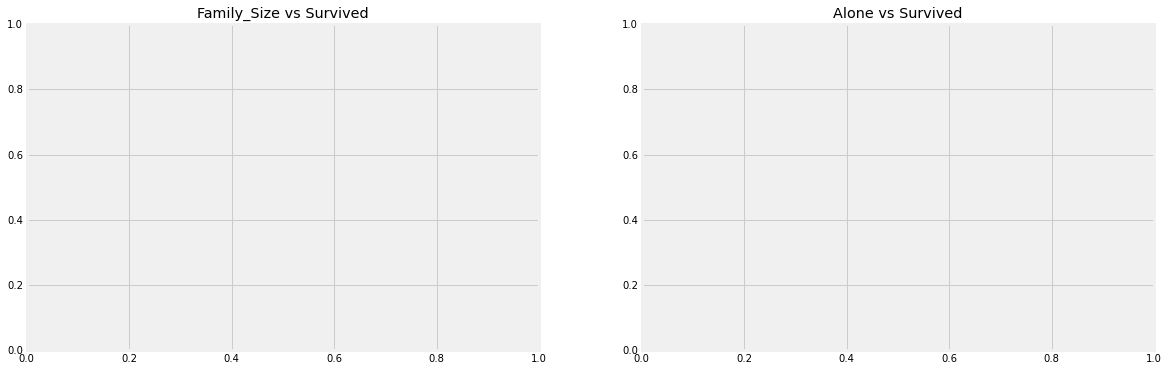

In [40]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

**Family_Size=0은 탑승자가 혼자임을 의미합니다.** 분명히 혼자이거나 family_size=0인 경우 생존 확률이 매우 낮습니다. For family size > 4 이면 확률도 감소합니다. 이 역시 이 모델에서 중요한 특징인 것 같습니다. 이에 대해 더 자세히 살펴보겠습니다.

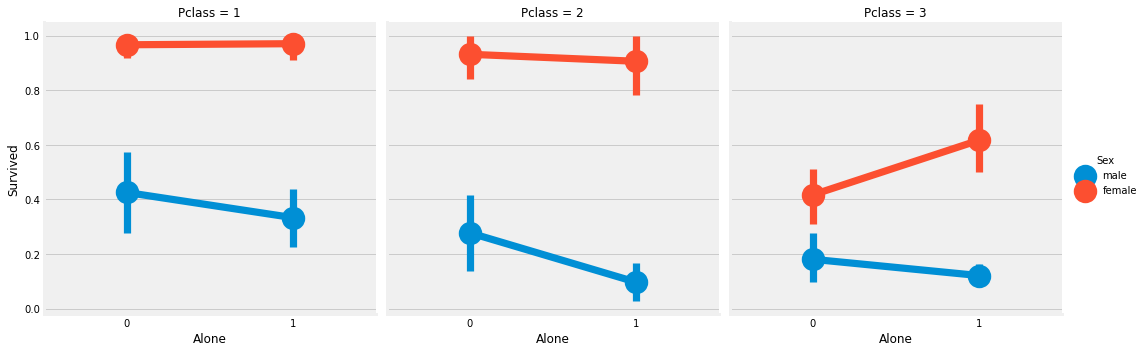

In [41]:
sns.factorplot('Alone','Survived',data=data,hue='Sex',col='Pclass')
plt.show()

혼자인 여성은 가족이 있는 여성보다 혼자 있을 확률이 높은 P클래스3를 제외하고는 성별이나 P클래스에 관계없이 혼자인 것이 좋지 않다는 것을 알 수 있습니다.

## Fare_Range

요금 또한 continous feature 이기 떄문에 ordinal value로 변환해야 합니다. 이를위해 **pandas.qcut** 을 사용합니다

**qcut** 이 하는 기능은 전달한 빈(bins) 수에 따라 값을 분할하거나 정렬하는 것입니다. 따라서 5개의 빈(bins)을 전달하면 값을 5개의 개별 빈(bins) 또는 값 범위로 동일한 간격으로 정렬합니다.

In [42]:
data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


위에서 설명한 것처럼 **Fare_Range** 가 증가하면 생존 확률이 증가한다는 것을 분명히 알 수 있습니다.

이제 Fare_Range 값을 그대로 넘어갈 수 없습니다. **Age_Band** 에서 했던 것처럼 단일값 으로 변환해야 합니다.

In [43]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

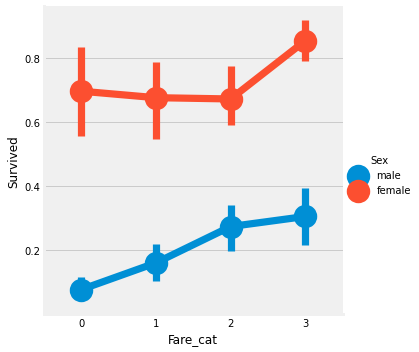

In [44]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')
plt.show()

분명히 Fare_cat이 증가하면 생존 확률이 증가합니다. 이 피처은 성별과 함께 모델링 시 중요한 기능이 될 수 있습니다.

## 문자열 값을 숫자로 변환하기

머신러닝 모델에 문자열을 전달할 수 없으므로 성, 승선 횟수(Sex, Embarked) 등의 특징을 숫자 값으로 변환해야 합니다.

In [45]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

### 불필요한 피처 삭제

**Name**--> 범주형 값으로 변활할 수 없다

**Age**--> Age_band 피처가 있다

**Ticket**--> 분류할 수 없는 문자열이다

**Fare**--> fare_cat 피처가 있다

**Cabin**--> 결측치가 많고 여러개의 객실을 가진 승객도 많다

**Fare_Range**--> fare_cat 피처가 있다

**PassengerId**--> 분류할 수 없다

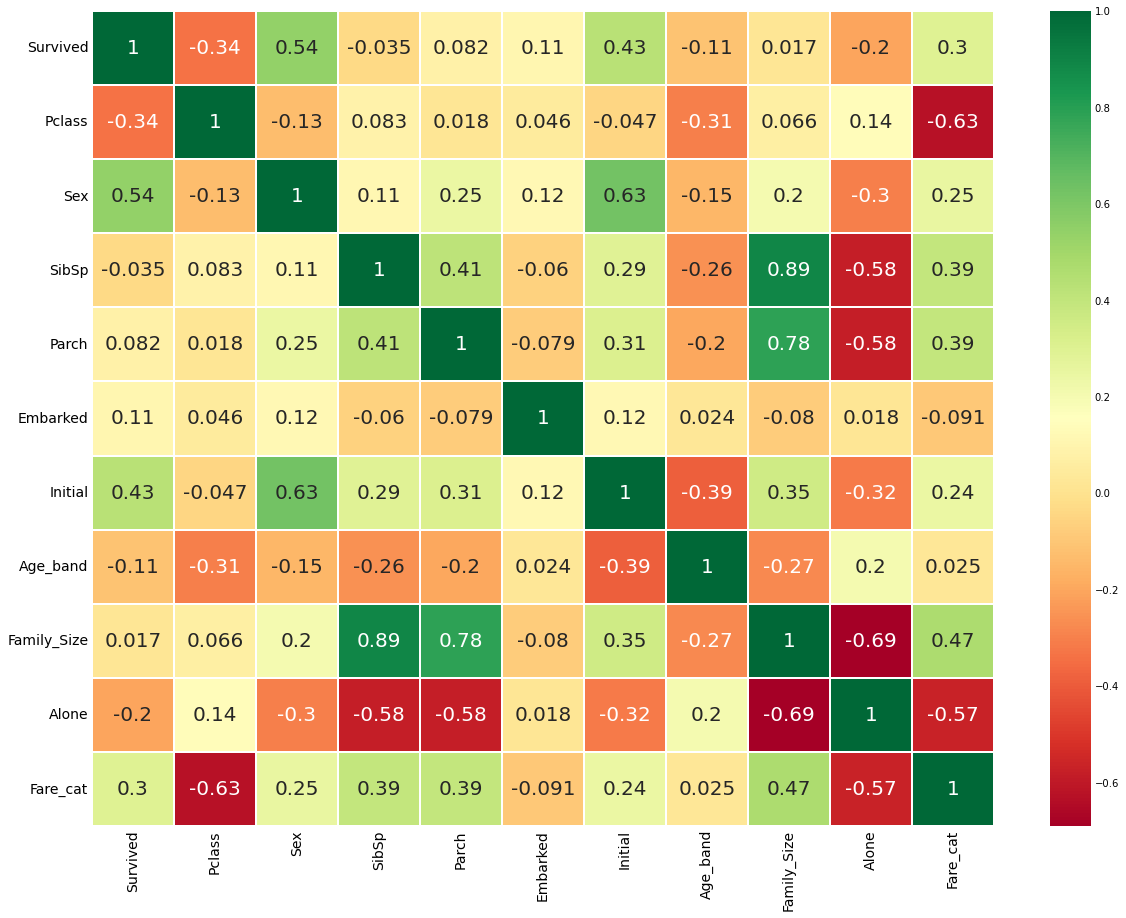

In [46]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

이제 위의 상관관계 도표에서 몇 가지 양의 상관관계가 있는 특징을 볼 수 있습니다. 그 중 일부는 **SibSp와 Family_Size**, **Parch와 Family_Size** 와 같은 양(+)의 상관관계이고, **Alone과 Family_Size.**와 같은 음(-)의 상관관계도 있습니다.

# Part3: 예측모델링(Predictive Modeling)

EDA 부분에서 몇 가지 인사이트를 얻었습니다. 하지만 그것만으로는 승객의 생존 여부를 정확하게 예측하거나 알 수 없습니다. \
따라서 이제 몇 가지 훌륭한 분류 알고리즘을 사용하여 승객의 생존 여부를 예측할 것입니다. 다음은 모델을 만드는 데 사용할 알고리즘입니다:

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree

7)Logistic Regression

In [47]:
#필요한 모든 ML 패키지 가져오기
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [48]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived']) #target의 class 비율을 유지 한 채로 데이터 셋을 split
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=data[data.columns[1:]]
Y=data['Survived']

### Radial Support Vector Machines(rbf-SVM)

In [49]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [50]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression

In [51]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree

In [52]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))


The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbours(KNN)

In [53]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.8134328358208955


이제 **n_neighbours** 속성의 값을 변경하면 KNN 모델의 정확도가 변경됩니다. 기본값은 **5**입니다. n_neighbours의 다양한 값에 따른 정확도를 확인해 보겠습니다.

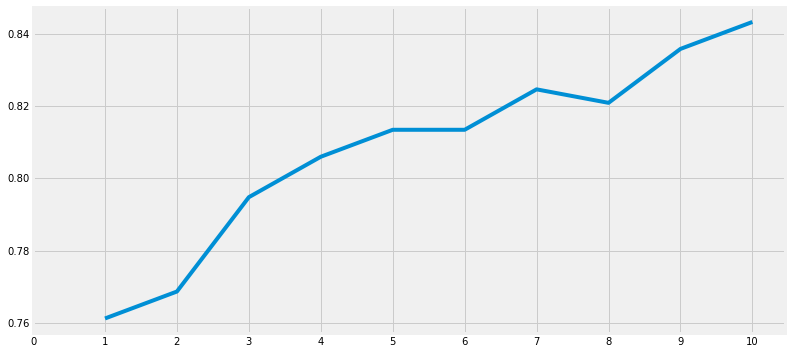

Accuracies for different values of n are: [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.8358209  0.84328358] with the max value as  0.8432835820895522


In [54]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

### Gaussian Naive Bayes

In [55]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forests

In [56]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8097014925373134


모델의 정확도만이 분류기의 견고성을 결정하는 유일한 요소는 아닙니다. 어떤 분류기가 학습 데이터에 대해 학습되고 테스트 데이터에 대해 테스트되었는데 정확도가 90%라고 가정해 봅시다.

이제 이것은 분류기의 정확도가 매우 좋은 것 같지만, 새로 들어오는 모든 테스트 세트에 대해 90%의 정확도를 보장할 수 있을까요? 대답은 **아니오**입니다. 분류기가 스스로 학습하는 데 사용할 모든 인스턴스를 결정할 수 없기 때문입니다. 훈련 및 테스트 데이터가 변경되면 정확도도 변경됩니다. 정확도는 증가하거나 감소할 수 있습니다. 이를 **모델 분산**이라고 합니다.

이를 극복하고 일반화된 모델을 얻기 위해 **교차 검증**을 사용합니다.



# Cross Validation

데이터의 불균형, 즉 클래스1 인스턴스 수는 많지만 다른 클래스 인스턴스 수는 적은 경우가 많습니다. 따라서 데이터 세트의 모든 인스턴스에 대해 알고리즘을 훈련하고 테스트해야 합니다. 그런 다음 데이터 세트에 대해 기록된 모든 정확도의 평균을 구할 수 있습니다. 

1)K-폴드 교차 검증은 먼저 데이터 집합을 K개로 나누는 방식으로 작동합니다.

2)데이터 집합을 (k=5)개의 부분으로 나눈다고 가정해 봅시다. 테스트용으로 한 부분을 남겨두고 나머지 4개 부분에 대해 알고리즘을 훈련합니다

3)각 반복에서 테스트 부분을 변경하고 다른 부분에 대해 알고리즘을 학습시키는 방식으로 프로세스를 계속 진행합니다. 그런 다음 정확도와 오류를 평균하여 알고리즘의 평균 정확도를 얻습니다.

이를 K-폴드 교차 검증이라고 합니다.

4)알고리즘이 일부 학습 데이터에 대해서는 데이터 세트에 적합하지 않을 수 있고, 다른 학습 데이터에 대해서는 데이터 세트에 적합할 수도 있습니다. 따라서 교차 검증을 통해 일반화된 모델을 얻을 수 있습니다.

In [57]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2
# 이 코드는 정확도 메트릭을 사용하여 7가지 분류 모델에 대해 accuracy로 k-폴드 교차검증을 수행하며
# 데이터를 10개의 동일한 부분으로 분할하여 각 모델을 훈련합니다.
# 9개 부분에 대해 학습시키고 나머지 부분에 대해 테스트합니다. 그다음 코드는 각 모델에 대한 정확도 점수의 평균과 표준 편차를 계산하고
# 정확도 점수의 평균과 표준 편차를 계산하여 데이터 프레임에 저장합니다.
# 결과 데이터 프레임에는 각 모델의 평균 정확도와 표준 편차가 표시됩니다.

,CV Mean,Std
Linear Svm,0.793471,0.047797
Radial Svm,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.812672,0.044030
Decision Tree,0.811461,0.029117
Naive Bayes,0.801386,0.028999
Random Forest,0.812597,0.029975


<AxesSubplot:>

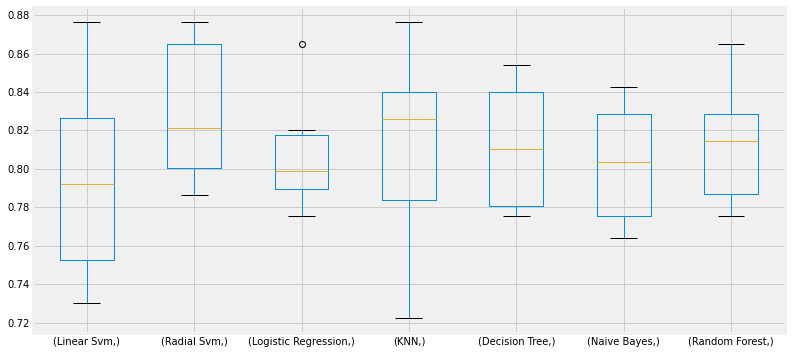

In [58]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

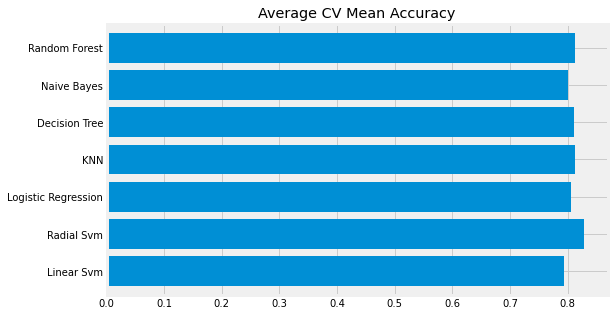

In [59]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

분류 정확도(accuracy)는 때때로 불균형으로 인해 오해의 소지가 있을 수 있습니다. 혼동 행렬(confusion matrix)을 통해 요약된 결과를 얻을 수 있는데, 혼동 행렬은 모델이 어디에서 잘못되었는지 또는 모델이 어떤 클래스를 잘못 예측했는지를 보여줍니다.

## Confusion Matrix

분류자가 분류한 올바른 분류와 잘못된 분류의 수를 제공합니다.

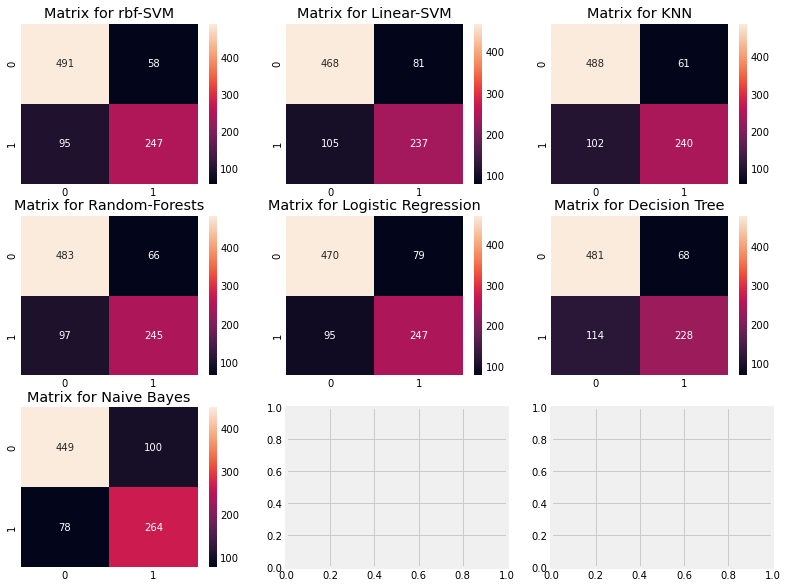

In [60]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

### 혼동 행렬(Confusion Matrix) 해석하기

왼쪽 대각선은 각 클래스에 대해 올바른 예측을 한 횟수를 나타내고 오른쪽 대각선은 잘못된 예측을 한 횟수를 나타냅니다. rbf-SVM의 첫 번째 플롯을 살펴봅시다:

1) 정답 예측 수는 **491(사망자) + 247(생존자)** 이며, 평균 CV 정확도는 **(491+247)/891 = 82.8%** 로 앞서 얻은 값입니다.

2) **Error** --> 사망자 58명을 생존자로 잘못 분류하고 생존자 95명을 사망자로 잘못 분류했습니다. 따라서 사망자를 생존자로 예측하여 더 많은 실수를 저질렀습니다.

모든 행렬을 살펴보면, rbf-SVM이 사망 승객을 정확하게 예측할 확률은 더 높지만 생존 승객을 정확하게 예측할 확률은 나이브베이즈가 더 높다고 말할 수 있습니다.

### Hyper-Parameters Tuning

The machine learning models are like a Black-Box. There are some default parameter values for this Black-Box, which we can tune or change to get a better model. Like the C and gamma in the SVM model and similarly different parameters for different classifiers, are called the hyper-parameters, which we can tune to change the learning rate of the algorithm and get a better model. This is known as Hyper-Parameter Tuning.

We will tune the hyper-parameters for the 2 best classifiers i.e the SVM and RandomForests.

#### SVM

In [61]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests

In [62]:
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


The best score for Rbf-Svm is **82.82% with C=0.05 and gamma=0.1**.
For RandomForest, score is abt **81.8% with n_estimators=900**.

# Ensembling

Ensembling is a good way to increase the accuracy or performance of a model. In simple words, it is the combination of various simple models to create a single powerful model.

Lets say we want to buy a phone and ask many people about it based on various parameters. So then we can make a strong judgement about a single product after analysing all different parameters. This is **Ensembling**, which improves the stability of the model. Ensembling can be done in ways like:

1)Voting Classifier

2)Bagging

3)Boosting.

## Voting Classifier

It is the simplest way of combining predictions from many different simple machine learning models. It gives an average prediction result based on the prediction of all the submodels. The submodels or the basemodels are all of diiferent types.

In [63]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
print('The cross validated score is',cross.mean())

The accuracy for ensembled model is: 0.8246268656716418
The cross validated score is 0.8226716604244693


## Bagging

Bagging is a general ensemble method. It works by applying similar classifiers on small partitions of the dataset and then taking the average of all the predictions. Due to the averaging,there is reduction in variance. Unlike Voting Classifier, Bagging makes use of similar classifiers.

#### Bagged KNN

Bagging works best with models with high variance. An example for this can be Decision Tree or Random Forests. We can use KNN with small value of **n_neighbours**, as small value of n_neighbours.

In [64]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8137952559300874


#### Bagged DecisionTree


In [65]:
model=BaggingClassifier(base_estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


## Boosting

Boosting is an ensembling technique which uses sequential learning of classifiers. It is a step by step enhancement of a weak model.Boosting works as follows:

A model is first trained on the complete dataset. Now the model will get some instances right while some wrong. Now in the next iteration, the learner will focus more on the wrongly predicted instances or give more weight to it. Thus it will try to predict the wrong instance correctly. Now this iterative process continous, and new classifers are added to the model until the limit is reached on the accuracy.

#### AdaBoost(Adaptive Boosting)

The weak learner or estimator in this case is a Decsion Tree.  But we can change the dafault base_estimator to any algorithm of our choice.

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting

Here too the weak learner is a Decision Tree.

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [68]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

[01:46:59] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:47:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:47:00] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to '

We got the highest accuracy for AdaBoost. We will try to increase it with Hyper-Parameter Tuning

#### Hyper-Parameter Tuning for AdaBoost

In [69]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


The maximum accuracy we can get with AdaBoost is **83.16% with n_estimators=200 and learning_rate=0.05**

### Confusion Matrix for the Best Model

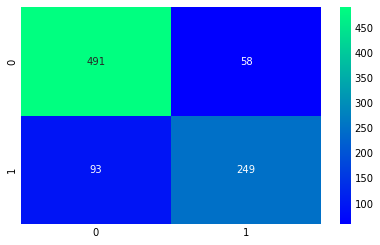

In [70]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

## Feature Importance

[01:51:44] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


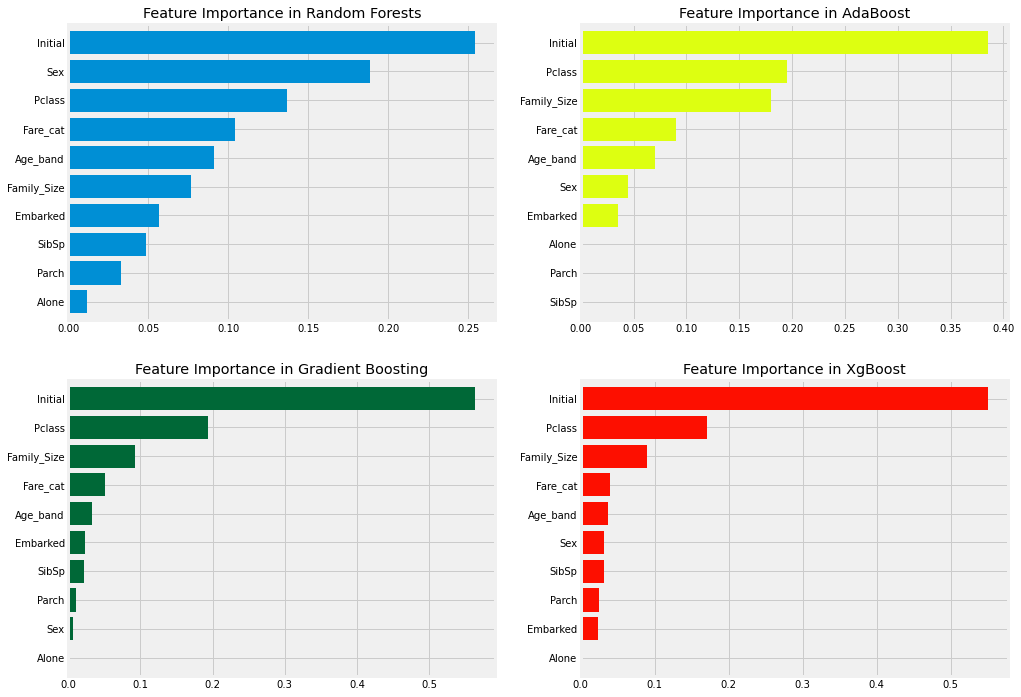

In [71]:
f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')
model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')
model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')
model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')
plt.show()

We can see the important features for various classifiers like RandomForests, AdaBoost,etc.

#### Observations:

1)Some of the common important features are Initial,Fare_cat,Pclass,Family_Size.

2)The Sex feature doesn't seem to give any importance, which is shocking as we had seen earlier that Sex combined with Pclass was giving a very good differentiating factor. Sex looks to be important only in RandomForests.

However, we can see the feature Initial, which is at the top in many classifiers.We had already seen the positive correlation between Sex and Initial, so they both refer to the gender.

3)Similarly the Pclass and Fare_cat refer to the status of the passengers and Family_Size with Alone,Parch and SibSp.

I hope all of you did gain some insights to Machine Learning. Some other great notebooks for Machine Learning are:
1) For R:[Divide and Conquer by Oscar Takeshita](https://www.kaggle.com/pliptor/divide-and-conquer-0-82297/notebook)

2)For Python:[Pytanic by Heads and Tails](https://www.kaggle.com/headsortails/pytanic)

3)For Python:[Introduction to Ensembling/Stacking by Anisotropic](https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python)

### Thanks a lot for having a look at this notebook. If you found this notebook useful, **Do Upvote**.
